In [ ]:


Replace 'DATASET_OWNER' and 'DATASET_NAME' with the appropriate values for the dataset you want to download.

Then you can unzip the dataset and load it into your notebook using the standard python libraries like


------------------------------------------------------------
with zipfile.ZipFile('DATASET_NAME.zip', 'r') as zip_ref:
    zip_ref.extractall()
------------------------------------------------------------


You can load the unzipped dataset using the pandas or other library.


"""

In [ ]:
# !pip install kaggle
# import json
# import zipfile
# import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # Change the current working directory to where to download the dataset which is fetch from kaggle.
# path = "/content/drive/MyDrive/Internship Report/Dataset/"
# %cd path

/content/drive/MyDrive/Internship Report/Dataset


In [ ]:
# # Run the following code to configure the path to “kaggle.json”.

# import os
# os.environ['KAGGLE_CONFIG_DIR'] = path

In [ ]:
# !kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 # at current directory location.

100% 5.19G/5.20G [00:38<00:00, 138MB/s]
100% 5.20G/5.20G [00:38<00:00, 146MB/s]


In [ ]:
# # Unzip the dataset-folder in your google drive
# with zipfile.ZipFile('/content/drive/MyDrive/Internship Report/Dataset/skin-cancer-mnist-ham10000.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [ ]:
# Delete any file or folder.
# !rm -rf "/content/drive/MyDrive/Internship Report/Dataset/skin-cancer-mnist-ham10000.zip"

# Start From Here

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
skin_df = pd.read_csv('/content/drive/MyDrive/Internship Report/Dataset/HAM10000_metadata.csv')

In [ ]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
SIZE = 32

In [ ]:
# label encoding to numeric values from text
le_model = LabelEncoder()
le_model.fit(skin_df['dx'])

LabelEncoder()

In [ ]:
print(list(le_model.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
skin_df['label'] = le_model.transform(skin_df["dx"])

In [ ]:
skin_df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1617,HAM_0007180,ISIC_0033272,mel,histo,65.0,male,face,4
8128,HAM_0007195,ISIC_0031923,nv,histo,40.0,female,lower extremity,5
2168,HAM_0001835,ISIC_0026652,mel,histo,65.0,male,back,4
1090,HAM_0000465,ISIC_0030583,bkl,consensus,35.0,female,trunk,2
7754,HAM_0001720,ISIC_0034010,nv,histo,45.0,male,abdomen,5
8071,HAM_0006333,ISIC_0024424,nv,histo,35.0,male,trunk,5
7423,HAM_0004548,ISIC_0032832,nv,histo,45.0,female,upper extremity,5
8984,HAM_0006526,ISIC_0026671,nv,histo,55.0,male,lower extremity,5
2310,HAM_0003102,ISIC_0032389,mel,histo,65.0,male,face,4
7256,HAM_0004260,ISIC_0025525,nv,histo,65.0,male,back,5


In [ ]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
label            0
dtype: int64

# Data distribution visualization

In [ ]:
skin_df['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [ ]:
skin_df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
skin_df['dx'].value_counts().index.tolist()

['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

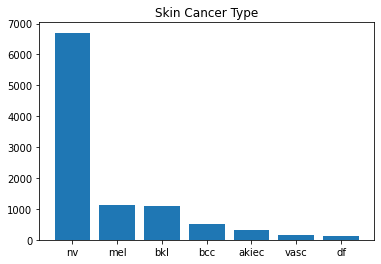

'\nunbalanced data\n'

In [ ]:
plt.bar(skin_df['dx'].value_counts().index.tolist(), skin_df['dx'].value_counts())
plt.title('Skin Cancer Type')
plt.show()

"""
unbalanced data
"""

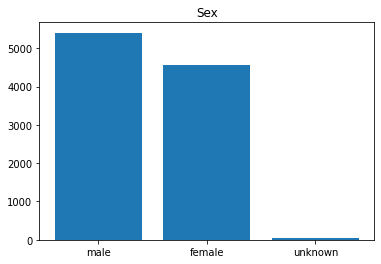

In [ ]:
plt.bar(skin_df['sex'].value_counts().index.tolist(), skin_df['sex'].value_counts())
plt.title('Sex')
plt.show()

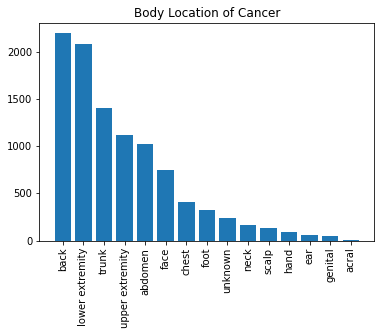

In [ ]:
plt.bar(skin_df['localization'].value_counts().index.tolist(), skin_df['localization'].value_counts())
plt.title('Body Location of Cancer')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


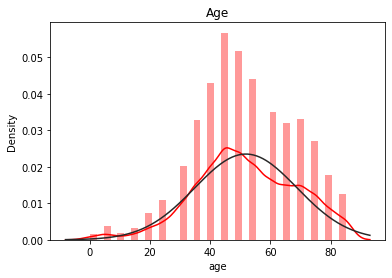

In [ ]:
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
plt.title('Age')
plt.show()

In [ ]:
# Distribution of data into various classes
skin_df['label'].value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64

In [ ]:
"""
solving unbalanced dataset
"""
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [ ]:
from sklearn.utils import resample

In [ ]:
# balance all the label data
n_samples = 500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
#Combined all balanced data into single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [ ]:
skin_df_balanced['label'].value_counts()

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64

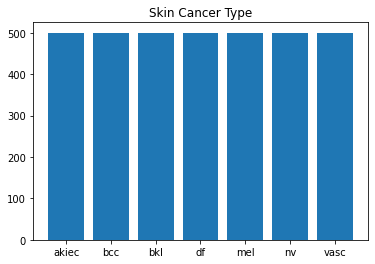

In [ ]:
plt.bar(skin_df_balanced['dx'].value_counts().index.tolist(), skin_df_balanced['dx'].value_counts())
plt.title('Skin Cancer Type')
plt.show()

In [ ]:
skin_df_balanced.shape

(3500, 8)

In [ ]:
skin_df_balanced.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             12
sex              0
localization     0
label            0
dtype: int64

In [ ]:
i=0
for x in glob(os.path.join('/content/drive/MyDrive/Internship Report/Dataset/', '*', '*.jpg')):
    if i>3:
        break
    print(x)
    i=i+1

/content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028306.jpg
/content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028307.jpg
/content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028308.jpg
/content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028309.jpg


In [ ]:
i=0
for x in glob(os.path.join('/content/drive/MyDrive/Internship Report/Dataset/', '*', '*.jpg')):
    if i>3:
        break
    print(os.path.basename(x))
    i=i+1

ISIC_0028306.jpg
ISIC_0028307.jpg
ISIC_0028308.jpg
ISIC_0028309.jpg


In [ ]:
i=0
for x in glob(os.path.join('/content/drive/MyDrive/Internship Report/Dataset/', '*', '*.jpg')):
    if i>3:
        break
    print(os.path.splitext(os.path.basename(x))[0])
    i=i+1

ISIC_0028306
ISIC_0028307
ISIC_0028308
ISIC_0028309


In [ ]:
#Now time to read images based on image ID from the CSV file
image_path = {os.path.splitext(os.path.basename(x))[0] : x for x in glob(os.path.join('/content/drive/MyDrive/Internship Report/Dataset/', '*', '*.jpg'))}

In [ ]:
len(image_path) # total 10015 images

10015

In [ ]:
image_path['ISIC_0028933']

'/content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028933.jpg'

In [ ]:
i=0
for key in image_path:
    print(key + ' : ' + image_path[key])
    if(i>3):
        break
    i=i+1

ISIC_0028306 : /content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028306.jpg
ISIC_0028307 : /content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028307.jpg
ISIC_0028308 : /content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028308.jpg
ISIC_0028309 : /content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028309.jpg
ISIC_0028310 : /content/drive/MyDrive/Internship Report/Dataset/HAM10000_images_part_1/ISIC_0028310.jpg


In [ ]:
# add path of image in dataframe
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [ ]:
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
skin_df_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/drive/MyDrive/Internship Report/Datas...,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/drive/MyDrive/Internship Report/Datas...,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/drive/MyDrive/Internship Report/Datas...,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/drive/MyDrive/Internship Report/Datas...,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/drive/MyDrive/Internship Report/Datas...,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."


In [ ]:
skin_df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 9789 to 2363
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     3500 non-null   object 
 1   image_id      3500 non-null   object 
 2   dx            3500 non-null   object 
 3   dx_type       3500 non-null   object 
 4   age           3488 non-null   float64
 5   sex           3500 non-null   object 
 6   localization  3500 non-null   object 
 7   label         3500 non-null   int64  
 8   path          3500 non-null   object 
 9   image         3500 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 300.8+ KB


In [ ]:
# fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
# for n_axs, (type_name, type_rows) in zip(m_axs, skin_df_balanced.sort_values(['dx']).groupby('dx')):
#     n_axs[0].set_title(type_name)
#     for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
#         c_ax.imshow(c_row['image'])
#         c_ax.axis('off')

In [ ]:
#Convert dataframe column of images into numpy array

# skin_df_balanced['image'].tolist()[0].shape
# len(skin_df_balanced['image'].tolist()) # 3500
# len(skin_df_balanced['image'].tolist()[0]) # 32
# len(skin_df_balanced['image'].tolist()[0][0]) # 32
# len(skin_df_balanced['image'].tolist()[0][0][0]) # 3

In [ ]:
X = np.asarray(skin_df_balanced['image'].tolist())

In [ ]:
# Scale image (try also another method like Standard-Scaler)
X = X/255.

In [ ]:
X.shape

(3500, 32, 32, 3)

In [ ]:
X[0]

array([[[0.60784314, 0.4627451 , 0.41960784],
        [0.63529412, 0.49411765, 0.4627451 ],
        [0.68235294, 0.54901961, 0.54117647],
        ...,
        [0.62352941, 0.4627451 , 0.40392157],
        [0.63137255, 0.50196078, 0.47058824],
        [0.53333333, 0.43137255, 0.40784314]],

       [[0.57647059, 0.41960784, 0.36470588],
        [0.61176471, 0.45882353, 0.41176471],
        [0.66666667, 0.52156863, 0.50196078],
        ...,
        [0.6745098 , 0.52156863, 0.4745098 ],
        [0.69019608, 0.56078431, 0.52156863],
        [0.6745098 , 0.56862745, 0.54509804]],

       [[0.64705882, 0.51372549, 0.48235294],
        [0.61176471, 0.45098039, 0.39215686],
        [0.61176471, 0.44313725, 0.40392157],
        ...,
        [0.6745098 , 0.52156863, 0.45882353],
        [0.65490196, 0.50980392, 0.44313725],
        [0.63137255, 0.50588235, 0.48235294]],

       ...,

       [[0.56470588, 0.42352941, 0.35294118],
        [0.58823529, 0.45098039, 0.37254902],
        [0.60784314, 0

In [ ]:
Y = skin_df_balanced['label']

In [ ]:
Y.shape

(3500,)

In [ ]:
Y.head(5)

9789    0
9957    0
9793    0
9758    0
9875    0
Name: label, dtype: int64

In [ ]:
Y_cat = to_categorical(Y, num_classes=7) # One-hot-encoding

In [ ]:
Y_cat.shape

(3500, 7)

In [ ]:
Y_cat[3100:3110]

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.3, random_state=42)

In [ ]:
#Define the model.
#I've used autokeras to find out the best model for this problem.
#You can also load pretrained networks such as mobilenet or VGG16

In [ ]:
# Create Model Layers
num_classes = 7

# 1st layer
model = Sequential()
model.add(Conv2D(256, (3,3), activation="relu", input_shape=(SIZE,SIZE,3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())


model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
# Now Train Model
batch_size = 16
epochs = 100

In [ ]:
# train model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
154/154 - 10s - loss: 1.8742 - acc: 0.2078 - val_loss: 1.7869 - val_acc: 0.2486 - 10s/epoch - 66ms/step
Epoch 2/100
154/154 - 1s - loss: 1.6952 - acc: 0.3033 - val_loss: 1.6259 - val_acc: 0.3343 - 1s/epoch - 9ms/step
Epoch 3/100
154/154 - 1s - loss: 1.5276 - acc: 0.3690 - val_loss: 1.4759 - val_acc: 0.3810 - 1s/epoch - 8ms/step
Epoch 4/100
154/154 - 1s - loss: 1.4496 - acc: 0.4286 - val_loss: 1.5175 - val_acc: 0.3619 - 1s/epoch - 8ms/step
Epoch 5/100
154/154 - 1s - loss: 1.4244 - acc: 0.4335 - val_loss: 1.3569 - val_acc: 0.4314 - 1s/epoch - 9ms/step
Epoch 6/100
154/154 - 1s - loss: 1.3720 - acc: 0.4514 - val_loss: 1.4075 - val_acc: 0.4524 - 1s/epoch - 8ms/step
Epoch 7/100
154/154 - 1s - loss: 1.3361 - acc: 0.4804 - val_loss: 1.3112 - val_acc: 0.4667 - 1s/epoch - 7ms/step
Epoch 8/100
154/154 - 1s - loss: 1.2863 - acc: 0.5020 - val_loss: 1.3648 - val_acc: 0.4429 - 847ms/epoch - 5ms/step
Epoch 9/100
154/154 - 1s - loss: 1.2693 - acc: 0.5135 - val_loss: 1.4046 - val_acc: 0.4419

# Check Accuracy

In [ ]:
# Check Accuracy Score
score = model.evaluate(x_test, y_test)
print('Accuracy : ', score[1])

33/33 [==============================] - 0s 7ms/step - loss: 0.7436 - acc: 0.7790
Accuracy :  0.7790476083755493


In [ ]:
history.history

{'loss': [1.874220371246338,
  1.695168375968933,
  1.527573585510254,
  1.4496302604675293,
  1.4244129657745361,
  1.3720066547393799,
  1.3360645771026611,
  1.28630793094635,
  1.2692627906799316,
  1.2887306213378906,
  1.2404615879058838,
  1.1805921792984009,
  1.18049955368042,
  1.201521873474121,
  1.1339277029037476,
  1.1403604745864868,
  1.084242820739746,
  1.0887537002563477,
  1.0491968393325806,
  1.0326884984970093,
  1.0303088426589966,
  1.0195449590682983,
  1.0066767930984497,
  0.9790055155754089,
  0.963058352470398,
  0.9562711119651794,
  0.9417951703071594,
  0.8950362801551819,
  0.910858690738678,
  0.9010862708091736,
  0.8574070334434509,
  0.8358858227729797,
  0.8520628213882446,
  0.8519033789634705,
  0.8473317623138428,
  0.7927747964859009,
  0.7827498316764832,
  0.8178701400756836,
  0.7480930685997009,
  0.794135570526123,
  0.7508916258811951,
  0.7245228886604309,
  0.7523372769355774,
  0.7137814164161682,
  0.7128674983978271,
  0.6985284686

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
accu = history.history['acc']
val_accu = history.history['val_acc']
epochs_size = range(1, len(loss)+1)

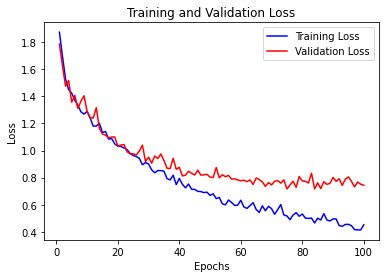

In [ ]:
# Training and Validation Loss
plt.plot(epochs_size, loss, 'b', label="Training Loss")
plt.plot(epochs_size, val_loss, 'r', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

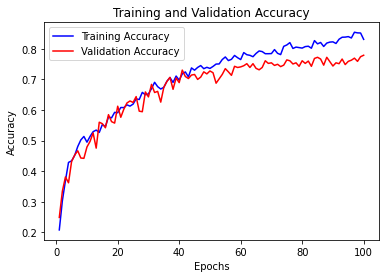

In [ ]:
#  Training and Validation Accuracy
plt.plot(epochs_size, accu, 'b', label='Training Accuracy')
plt.plot(epochs_size, val_accu, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediction on test data
y_pred = model.predict(x_test)
y_pred[0]

33/33 [==============================] - 0s 3ms/step


array([2.2925237e-02, 3.5048451e-02, 9.5501365e-03, 9.3112433e-01,
       1.0582895e-03, 2.4249197e-04, 5.1102135e-05], dtype=float32)

In [ ]:
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1) # get the index of the class which has max prediction of all data

In [ ]:
len(y_pred_classes)

1050

In [ ]:
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) # get the index of the true label of all data.

In [ ]:
len(y_true)

1050

In [ ]:
# Now print Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm

array([[134,  12,  24,   2,   2,   1,   0],
       [ 10, 111,  16,   4,   4,   5,   3],
       [  7,   7, 104,   1,  17,  11,   0],
       [  0,   7,   1, 142,   0,   0,   0],
       [  5,  10,  17,   0,  83,  18,   0],
       [  0,   8,  12,   0,  25,  91,   0],
       [  0,   0,   0,   0,   2,   1, 153]])

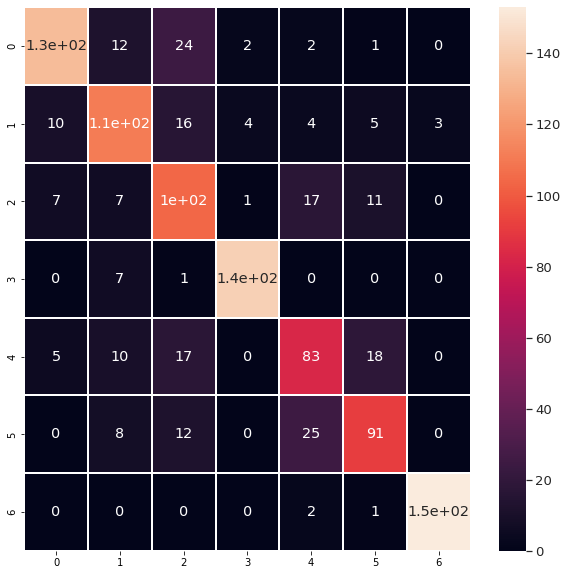

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, linewidths=1, ax=ax)

In [ ]:
np.diag(cm)

array([134, 111, 104, 142,  83,  91, 153])

In [ ]:
np.sum(cm, axis=1)

array([175, 153, 147, 150, 133, 136, 156])

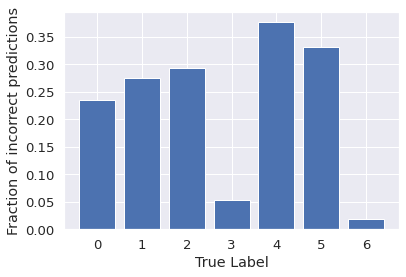

In [ ]:
#Plot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.show()

# %age of incorrect classification.